In [ ]:
# Pandas - Panel Data
# Data Analysis : Converting the raw data into useful form
# 1. Series : 1 Dimensional object(Vector)
# 2. DataFrame : 2 Dimensional object(Matrix)

In [3]:
# Creating a Series from Numpy Array(Vector)

import numpy as np
a = np.array(["Skin","Nose","Eyes"])
a

array(['Skin', 'Nose', 'Eyes'], dtype='<U4')

In [5]:
type(a)

numpy.ndarray

In [4]:
import pandas as pd
b = pd.Series(a)
b

0    Skin
1    Nose
2    Eyes
dtype: object

In [8]:
print(b.ndim)
type(b)

1


pandas.core.series.Series

In [ ]:
# DataFrame will have Rows and Columns just like excel sheet
# 1. csv - Comma seperated values | pd.read_csv('')
# 2. Excel - spreadsheet          | pd.read_excel('')
# 3. txt- Text File               | pd.read_table('')

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Business Analytics - Learn to Upgrade/LTU - AI for Healthcare/Noshow.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [10]:
df.shape

(110527, 14)

In [11]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [12]:
type(df)

pandas.core.frame.DataFrame

In [17]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [18]:
df[5:11]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No


In [21]:
# Selecting one column = THis is considered to be a Series
df['Gender']

0         F
1         M
2         F
3         F
4         F
         ..
110522    F
110523    F
110524    F
110525    F
110526    F
Name: Gender, Length: 110527, dtype: object

In [ ]:
# 1. How many unique values are present in each column?
# 2. What are the unique Values?
# 3. How many times unique values are present in the column?

In [22]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [25]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [31]:
gender = df['Gender']
gender,count = np.unique(gender,return_counts=True)
print(gender)
print(count)

['F' 'M']
[71840 38687]


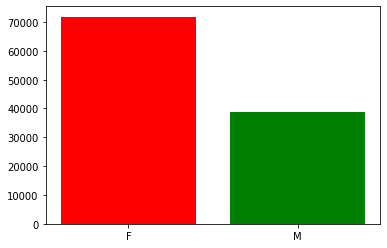

In [33]:
import matplotlib.pyplot as plt
plt.bar(gender,count,color=['r','g'])
plt.show()

In [36]:
# Method 2
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [ ]:
# How many Male turned up on the day of checking?

In [44]:
up = df[df['No-show']=='Yes']['Gender'].value_counts()
up

F    14594
M     7725
Name: Gender, dtype: int64

In [45]:
down = df[df['No-show']=='No']['Gender'].value_counts()
down

F    57246
M    30962
Name: Gender, dtype: int64

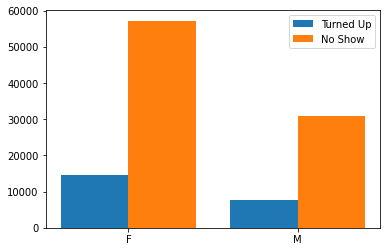

In [49]:
# Plot a grouped Bar graph with above values
plt.bar(up.index,up,width=-0.4,align='edge',label = 'Turned Up')
plt.bar(down.index,down,width=0.4,align='edge',label='No Show')
plt.legend()
plt.show()

In [79]:
x = df['AppointmentDay'].value_counts(sort=False)


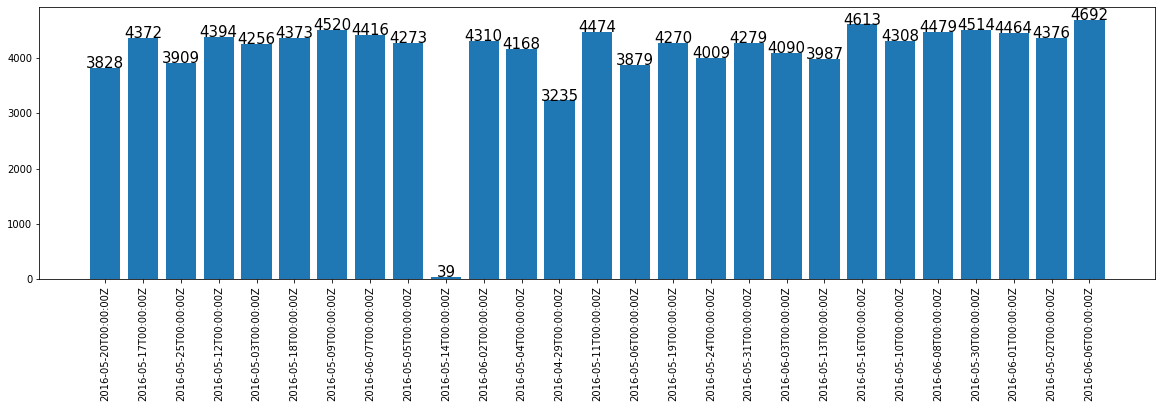

In [78]:
#AP = df['AppointmentDay'].value_counts()
import seaborn as sns
plt.figure(figsize=(20,5))
plt.bar(x.index,x)
for i in range(27):
  plt.text(i,x[i],x[i],fontsize=15,ha='center')
plt.xticks(rotation=90)
plt.show()

In [61]:
x = df['No-show'].value_counts()
x

No     88208
Yes    22319
Name: No-show, dtype: int64

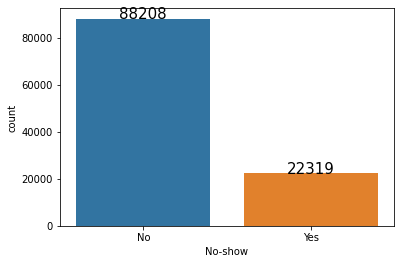

In [70]:
sns.countplot(x='No-show',data=df)
for i in range(2):
  plt.text(i,x[i],x[i],fontsize=15,ha='center')

plt.show()

In [82]:
# Check for Null values(Missing values)
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [83]:
df['Age'].max()

115

In [84]:
df['Age'].min()

-1

(array([7233., 5782., 7154., 6856., 6843., 7515., 7656., 6851., 7358.,
        8107., 7756., 6771., 5105., 3361., 2573., 1928., 1018.,  347.,
          63.]),
 array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
         70,  75,  80,  85,  90,  95, 100]),
 <a list of 19 Patch objects>)

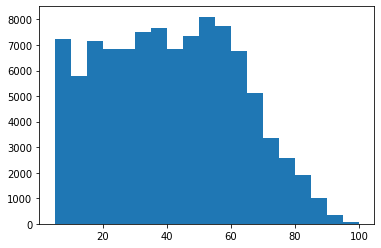

In [89]:
b = np.arange(5,101,5)
plt.hist(df['Age'],bins=b)

In [ ]:
# Consider Neighborhood column, take the top 5 neighborhood and plot a bar graph